<div style="text-align:center; padding: 30px; background: linear-gradient(45deg, #3498db, #c0392b); border-radius: 15px; color: #ffffff; box-shadow: 0 10px 20px rgba(0, 0.1, 0.2, 0.3);">
  <h1 style="font-family: 'Comicsans', cursive; font-size: 48px; font-weight: bold; letter-spacing: 2px; text-transform: uppercase; margin-bottom: 10px;">Titanic Survival Prediction Model</h1>
</div>


<div style="text-align:center; padding: 20px; background-color: #f2f2f2; border-radius: 10px; border: 2px solid #3498db;">
  <h1 style="color: #3498db;">Data Analysis</h1>
</div>


In [ ]:
# In data overview there are varoius tasks performed which we will discuss below step by step

In [4]:
# First of all we will import all the necessary libraries required for Data Model
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
# Now we will import the data set using dataframe
df_titanic_data = pd.read_csv("tested.csv")

In [55]:
# Now we will print 1st 5 rows of dataframe using head() function
df_titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [56]:
# Now we will find columns using column function
df_titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<div style="text-align:center; padding: 20px; background-color: #f2f2f2; border-radius: 10px; border: 2px solid #3498db;">
  <h1 style="color: #3498db;">Data Overview</h1>
</div>



## Information about columns
- 'PassengerId': Passenger number.
- 'Survived': 0 = Dead 1 = Alive
- 'Pclass': 1 = First class 2 = Seco
- 'Name': Name of passenger
- 'Sex': Gender
- 'Age': Age of passenger
- 'SibSp': Number of siblings
- 'Parch': Parch
- 'Ticket': Ticket
- 'Fare': Fare
- 'Cabin': Cabin
- 'Embarked': C = Cherbourg Q = Queenstown S = Southampton


In [57]:
# Here we will get some information about the data using info function
df_titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


- `float64(2):` One column with float data type, likely representing 'Age' & 'Fare'.
- `int64(5):` Five columns with integer data type, likely representing 'PassengerId', 'Survived', 'Pclass', 'SibSp' and 'Parch'.
- `object(5):` Ten columns with object data type, likely representing categorical or string data, including 'Name', 'Sex', 'Ticket', 'Cabin', 'City' &'Embarked'.

In [58]:
# Now number of categorical & numerical column is to be find
df_titanic_data.dtypes.value_counts() # Here dtypes.value_counts() function gives us number of categorical numercial columns
# Here after running the above code we found out that this data set contains 7 numerical values and 5 categorical values  

int64      5
object     5
float64    2
dtype: int64

In [59]:
# Here we will find the shape of data using shape function 
df_titanic_data.shape
# Here on running the above command we've got number of columns & rows   i.e. 418 & 12 respectively 

(418, 12)

<div style="text-align:center; padding: 20px; background-color: #f2f2f2; border-radius: 10px; border: 2px solid #3498db;">
  <h1 style="color: #3498db;">Data Preprocessing</h1>
</div>


In [9]:
# Data preprocessing is also called as Data Cleaning. Here there are majorly 2 steps i.e. Null Value handling and changing
# invalid column name.


# So firstly we will check the number of missing values in each column (these are valid null values)
df_titanic_data.isnull().sum()

# After running he above code we found out that Age, Cabin and Fare are having missing values 

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [10]:
# Now we will handle the missing values one by one:

#  For 'Cabin' column we will drop the 'Cabin' column from dataset as a large number of data is missing
df_titanic_data = df_titanic_data.drop(columns='Cabin',axis=1) 
# So, now the column 'Cabin' is dropped from the dataset

KeyError: "['Cabin'] not found in axis"

In [14]:
# For age column we will replace the missing values with the mean of age so that we can can approximate values for all 
# the missing values
df_titanic_data['Age'].fillna(df_titanic_data['Age'].mean(),inplace=True)

In [15]:
# For fare column we will find out the mode value and substitute it for the missing value
df_titanic_data['Fare'].fillna(df_titanic_data['Fare'].mode()[0],inplace=True)

In [64]:
# To Check whether the missing values are handled or not we will run the isnull() command once again
df_titanic_data.isnull().sum()

# Now we can see that there are no missing values(valid missing values) in the dataset

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [65]:
# First of all we will get some statistical measures regarding the data for data analysis 
df_titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.560497
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.857145
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


 - `Count:`

Indicates the number of non-null values for each column.
All columns have 418 non-null values, suggesting there are no missing values in the dataset.
 - `Mean:`

Represents the mean (average) value for numeric columns.
For example, the mean 'Age' is 30.272590 and the mean 'Fare' is 35.560497.
 - `Min, 25%, 50%, 75%, Max:`

These percentiles provide information about the distribution of numeric columns.
'Min' is the minimum value, '25%' is the first quartile, '50%' is the median, '75%' is the third quartile, and 'Max' is the maximum value.
 - `Std:`

Represents the standard deviation, which measures the amount of variation or dispersion in a set of values.
For example, the standard deviation of 'Survived' is 0.481622 and 'Fare' is 55.857145.

In [66]:
# Now we will find the number of people who survived and not survived
df_titanic_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

<div style="text-align:center; padding: 20px; background-color: #f2f2f2; border-radius: 10px; border: 2px solid #3498db;">
  <h1 style="color: #3498db;">Data Visualization</h1>
</div>


In [67]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

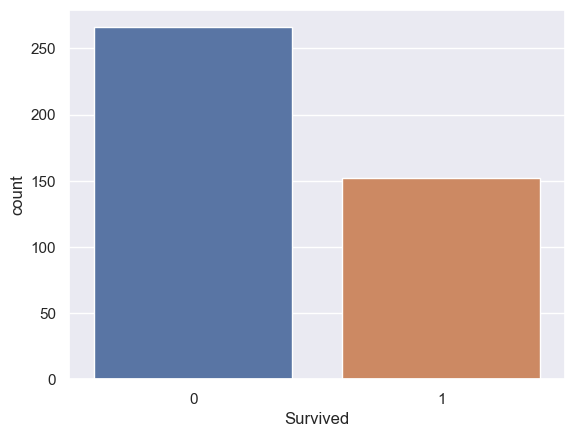

In [68]:
# Now we will make a count plot for "Survived" column
sns.countplot(x='Survived',data= df_titanic_data)

In [69]:
# Finding number of Male and Female who survived
df_titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

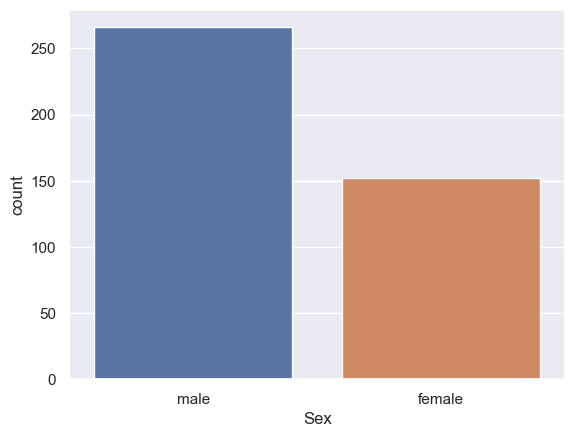

In [70]:
# Now we will make a count plot for "Sex" column
sns.countplot(x='Sex',data= df_titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

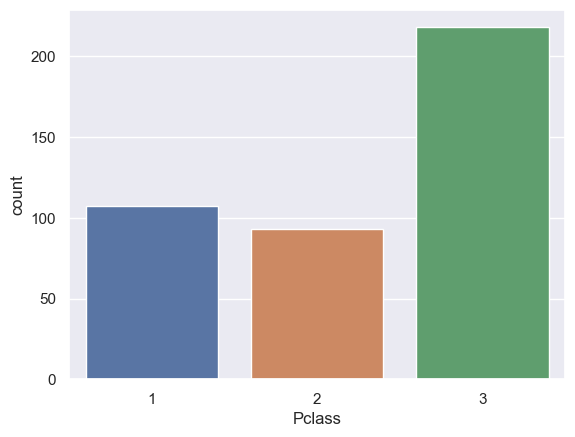

In [71]:
# Now we will make a count plot for "pclass" column
sns.countplot(x='Pclass',data= df_titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

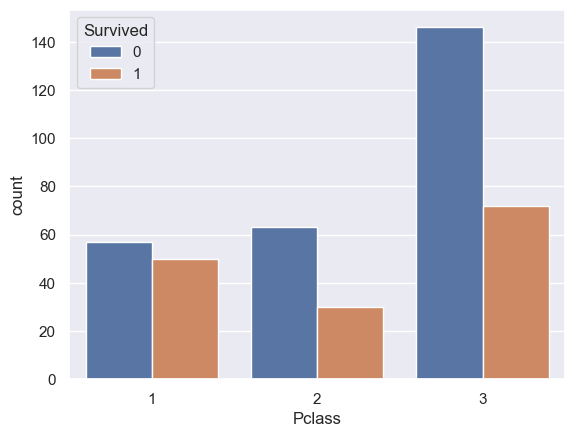

In [72]:
# Count plot for finding number of peple survived based on pclass
sns.countplot(x='Pclass', hue='Survived',data=df_titanic_data)

<div style="text-align:center; padding: 20px; background-color: #f2f2f2; border-radius: 10px; border: 2px solid #3498db;">
  <h1 style="color: #3498db;">Feature Engineering</h1>
</div>


In [73]:
# Now we wil encode the categorical comumns so that machine learning model can easily understands it
df_titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [74]:
df_titanic_data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [75]:
# Converting categorical columns
df_titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [76]:
df_titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


In [77]:
# Separating features and target
x = df_titanic_data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y = df_titanic_data['Survived']

In [78]:
print(x)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [79]:
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [80]:
#Now we will split data into training data & test data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [81]:
print(x.shape,x_train.shape,x_test.shape)

(418, 7) (334, 7) (84, 7)


<div style="text-align:center; padding: 20px; background-color: #f2f2f2; border-radius: 10px; border: 2px solid #3498db;">
  <h1 style="color: #3498db;">Model Training</h1>
</div>


In [82]:
# Logistic Regression

model = LogisticRegression()

In [83]:
# Training the logistic regression model with training data
model.fit(x_train,y_train)

C:\Users\KHUSHI\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

<div style="text-align:center; padding: 20px; background-color: #f2f2f2; border-radius: 10px; border: 2px solid #3498db;">
  <h1 style="color: #3498db;">Model Evaluation</h1>
</div>


In [84]:
# Accuracy Score
#Accuracy on training data
X_train_prediction = model.predict(x_train)

In [85]:
print(X_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [86]:
training_data_accuracy = accuracy_score(y_train,X_train_prediction)
print("Accuracy score of training data : ",training_data_accuracy)

Accuracy score of training data :  1.0


In [87]:
#Accuracy on test data
X_test_prediction = model.predict(x_test)

In [88]:
print(X_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [89]:
test_data_accuracy = accuracy_score(y_test,X_test_prediction)
print("Accuracy score of test data : ",test_data_accuracy)

Accuracy score of test data :  1.0
